# Proyek Analisis Data: products dataset
- **Nama:** Tia Noviani
- **Email:** tia_n@mhs.usk.ac.id
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 (What are the top 10 product categories by number of products?)
- Pertanyaan 2 (How does the distribution of product dimensions vary across different product categories?)

## Import Semua Packages/Library yang Digunakan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns

In [44]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


## Data Wrangling

### Gathering Data

In [19]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [20]:
print(products_df.info())
print(products_df.describe())
print(products_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.4952

### Cleaning Data

In [21]:
# Check for missing values
missing_values = products_df.isnull().sum()

# Check for duplicates in product_id
duplicates = products_df['product_id'].duplicated().sum()

# Convert numerical columns to appropriate data types
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype('int64', errors='ignore')
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype('int64', errors='ignore')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('int64', errors='ignore')

# Display the results
print('Missing Values:')
print(missing_values)
print('\
Duplicates in product_id:', duplicates)

# Display the updated data types
print('\
Updated Data Types:')
print(products_df.dtypes)

Missing Values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplicates in product_id: 0
Updated Data Types:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


In [22]:
# Fill missing values for 'product_category_name' with 'unknown'
products_df['product_category_name'].fillna('unknown', inplace=True)

# Impute missing numerical values with median
for column in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    median_value = products_df[column].median()
    products_df[column].fillna(median_value, inplace=True)

# Convert numerical columns to integers
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype(int)
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype(int)
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)

# Check for missing values again to confirm changes
missing_values_after = products_df.isnull().sum()

print('Missing Values After Cleaning:')
print(missing_values_after)

Missing Values After Cleaning:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
# Impute missing numerical values with median
for column in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    median_value = products_df[column].median()
    products_df[column].fillna(median_value, inplace=True)

# Convert numerical columns to integers
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype(int)
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype(int)
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)

In [24]:
# Selecting a few categories for visualization to keep the plot readable
selected_categories = products_df['product_category_name'].value_counts().nlargest(5).index
filtered_df = products_df[products_df['product_category_name'].isin(selected_categories)]


In [25]:
# Specify the path where to save the CSV file
output_csv_path = "./data/df.csv"

# Save the all_data to a CSV file
products_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:What are the top 10 product categories by number of products?

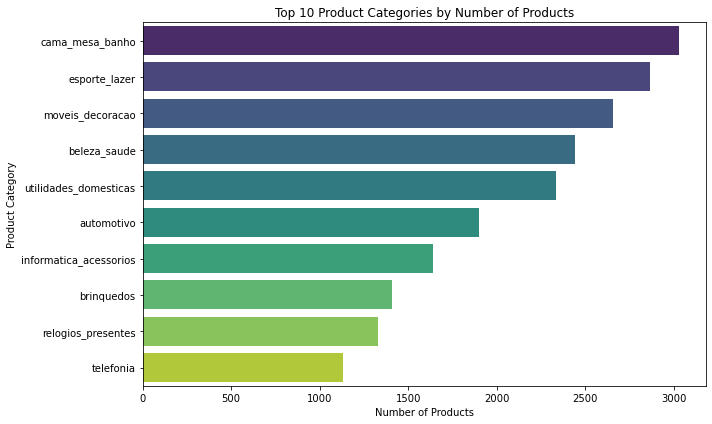

Plot generated and saved as top_10_product_categories.png


In [26]:
# Plotting the top 10 product categories by number of products
plt.figure(figsize=(10, 6), facecolor='white')
top_categories = products_df['product_category_name'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('top_10_product_categories.png')
plt.show()
print('Plot generated and saved as top_10_product_categories.png')

### Pertanyaan 2: How does the distribution of product dimensions vary across different product categories?

<Figure size 1008x720 with 0 Axes>

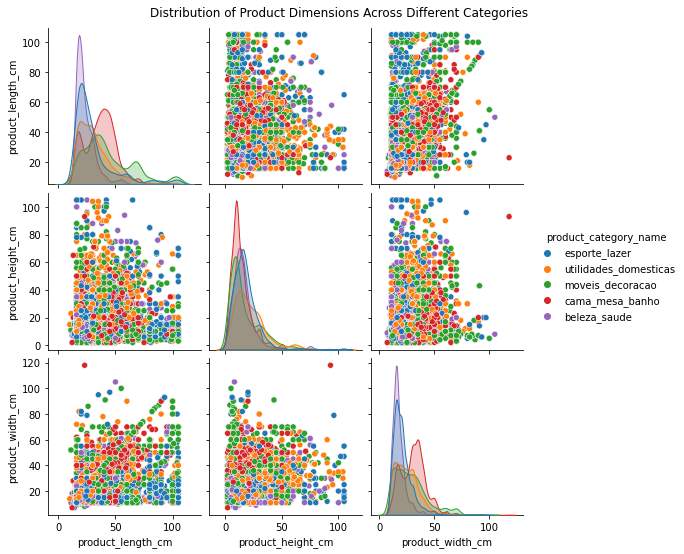

In [27]:
# Plotting categories product
plt.figure(figsize=(14, 10), facecolor='white')
sns.pairplot(data=filtered_df, hue='product_category_name', vars=['product_length_cm', 'product_height_cm', 'product_width_cm'])
plt.suptitle('Distribution of Product Dimensions Across Different Categories', y=1.02)
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
1. The category "cama_mesa_banho" stands out as the category with the highest number of products, indicating a significant presence in the dataset. This category is followed closely by "esporte_lazer" and "moveis_decoracao" in terms of product count. 
2. The plot showcases the diversity of products available in different categories, with varying quantities across the top 10 categories. This diversity reflects the range of offerings in the dataset.
3. By visualizing the product distribution, stakeholders can gain insights into the popularity and abundance of products in each category. This information can be valuable for inventory management, marketing strategies, and product development decisions.


- Conclution pertanyaan 2 :
1. The pair plot displays the distribution of product dimensions (length, height, width) across different product categories. Each point on the plot represents a product, with colors indicating the product category. By analyzing the relationships between the dimensions within each category, you can observe how the dimensions vary and potentially identify any patterns or outliers. This visualization offers a comprehensive view of how product dimensions are distributed across various product categories, providing insights into the relationships and variations in dimension values within each category.